# Exploratory Data Analysis (EDA)

## Obejective
The objective of this notebook is to perform an exploratory analysis of the dataset (SMS Spam Collection). This analysis have the objective to understand the structure, distribution, and basic characteristics of the dataset, before any preprocessing is applied.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


## Dataset Description

The SMS Spam Collection dataset consists of a set of SMS Messages that have been manually labelled as either "spam" or "ham" (ham means legitimate message). Each entry have the label and the corresponding message.<br>

In [22]:
data_path = "../datasets/raw//SMSSpamCollection"
df = pd.read_csv(data_path, sep="\t", header=None, names=["label", "message"])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Dataset Overview

This section provides a high level overview of the dataset. Including size, structure, and if it have any missing or duplicated values. (During the selection of the dataset, was selected one dataset without any missing data, but the analysis is going to include it for academic purpose).

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Data Quality Checks

One important step, is the analysis for any missing or duplicated values. Because if the dataset contains any this could affect the model training in the end.


In [6]:
missing_values = df.isnull().sum()
duplicate_rows = df.duplicated().sum()

print("Missing values per column:")
print(missing_values)

print("\nNumber of duplicated rows:")
print(duplicate_rows)

Missing values per column:
label      0
message    0
dtype: int64

Number of duplicated rows:
403


The dataset have duplicated data but no missing values

## Class Distribution

The distribution of spam and ham messages is analysed to determine if the dataset is imbalanced. Class imballance can significantly affect model evaluation and may require the use of metrics other than accuracy.

In [7]:
class_counts = df["label"].value_counts()
class_counts

label
ham     4825
spam     747
Name: count, dtype: int64

Here we can check that the dataset is not ballanced.

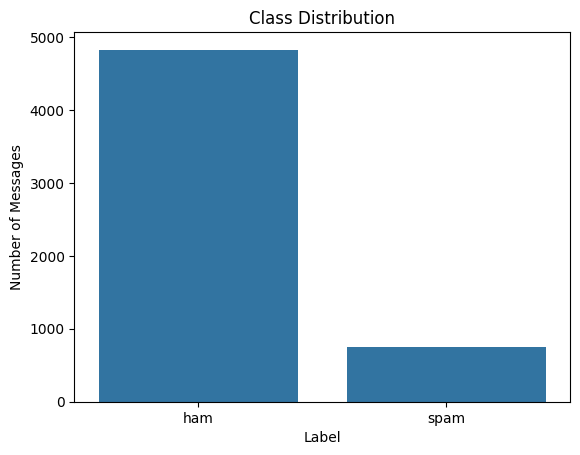

In [8]:
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Number of Messages")
plt.show()


## Message Length Analysis

Analysing the length of messages provides insights into differences between spam and legitimate messages, which may influence feature extraction techniques.

In [9]:
df["message_length"] = df["message"].apply(len)

df.groupby("label")["message_length"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.482487,58.440652,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


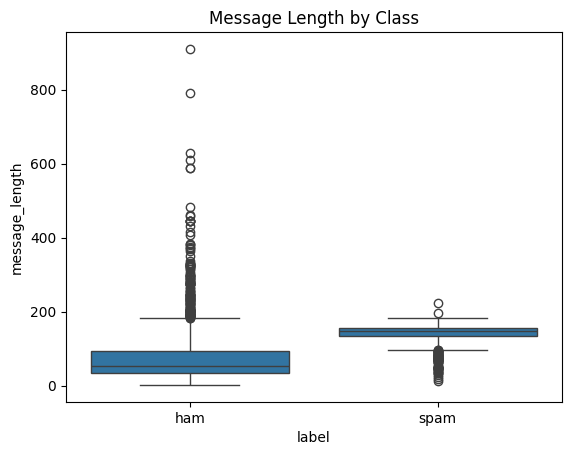

In [10]:
sns.boxplot(x="label", y="message_length", data=df)
plt.title("Message Length by Class")
plt.show()

## Sample Messages 

To better understand the nature of the dataset, a small number of examples message from each class is selected for inspection (In this case 3). 

In [17]:
df[df["label"] == "spam"].sample(3, random_state=42)["message"].values


array(['Summers finally here! Fancy a chat or flirt with sexy singles in yr area? To get MATCHED up just reply SUMMER now. Free 2 Join. OptOut txt STOP Help08714742804',
       'This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08718726970 NOW! Only 10p per min. BT-national-rate ',
       'Get ur 1st RINGTONE FREE NOW! Reply to this msg with TONE. Gr8 TOP 20 tones to your phone every week just £1.50 per wk 2 opt out send STOP 08452810071 16'],
      dtype=object)

In [21]:
df[df["label"] == "ham"].sample(3, random_state=42)["message"].values

array(["If i not meeting ü all rite then i'll go home lor. If ü dun feel like comin it's ok.",
       'I.ll always be there, even if its just in spirit. I.ll get a bb soon. Just trying to be sure i need it.',
       'Sorry that took so long, omw now'], dtype=object)

## Summary of findings

The exploratory data analysis shows that the SMS Spam Collection dataset is composed by 5572 labelled SMS messages, divided by either spam or ham. 

No missing values were identified in the dataset. However, 403 messages are duplicated.

The class distribution is moderately imbalance, with spam messages representing less than 20% of total messages in the dataset. This reflects a real world scenario, were only a small numbers of messages are spam. This will forces the use of others evaluation metrics other than accuracy, such as precision, recall, and F1-score.

An analysis of message length indicates noticeable differences between spam and ham messages, with spam messages usually being longer, but between an certain range, otherwise ham messages don't have a defined length. This can be usufull during classification techniques. 

In the end we can conclude the dataset is suitable for supervised learning and provides a solid basis for building and evaluating spam detection models. 